# NFT Analytics Project
This project uses the Verbwire API to retrieve necessary data

In [109]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

pd.set_option('display.max_rows', 100)

## Functions
Below are all the functions used to extract data from the API

### Get all of the NFTs owned by a sepcific wallet
Function returns JSON-style dictionary from a response object

In [110]:

def getNFTs():
    """Gets the NFT's owned by a specific wallet address and returns a JSON response object"""
    
    walletAddress = input("Enter wallet address to use") #0x8b2Abf9618cb3899B8459dE211eAdF53598245aD
    url = f"https://api.verbwire.com/v1/nft/data/owned?walletAddress={walletAddress}&chain=ethereum"

    headers = {
        "accept": "application/json",
        "X-API-Key": "sk_live_44463b61-a57b-47a0-a501-bd5ab8c2e71f"
    }

    response = requests.get(url, headers=headers)
    return response.json()


### Get sales events for a slug
Function returns JSON-style dictionary from a response object

In [111]:
def getSalesEvent():
    """Gets the sales events of a slug and returns a JSON response object"""

    slug = input("Enter a slug to use") #boredapeyachtclub
    url = f"https://api.verbwire.com/v1/nft/data/salesEventsForSlug?slug={slug}&chain=ethereum&limit=100&offset=0&sortDirection=DESC"

    headers = {
        "accept": "application/json",
        "X-API-Key": "sk_live_44463b61-a57b-47a0-a501-bd5ab8c2e71f"
    }

    response = requests.get(url, headers=headers)
    return response.json()


### Get ownership data for a slug
Function returns JSON-style dictionary from a response object

In [112]:
def getOwnership():
    """Gets all the wallets that own a particular slug and returns a JSON reponse object"""
    
    slug = input("Enter a slug to use") #boredapeyachtclub
    url = f"https://api.verbwire.com/v1/nft/data/ownershipForSlug?slug={slug}&chain=ethereum&limit=100&page=1&sortDirection=DESC"

    headers = {
        "accept": "application/json",
        "X-API-Key": "sk_live_44463b61-a57b-47a0-a501-bd5ab8c2e71f"
    }

    response = requests.get(url, headers=headers)
    return response.json()

## Data Analysis

### Plots a histogram representing the count of all the unique token names owned by a specific wallet

Total NFTs owned: 44


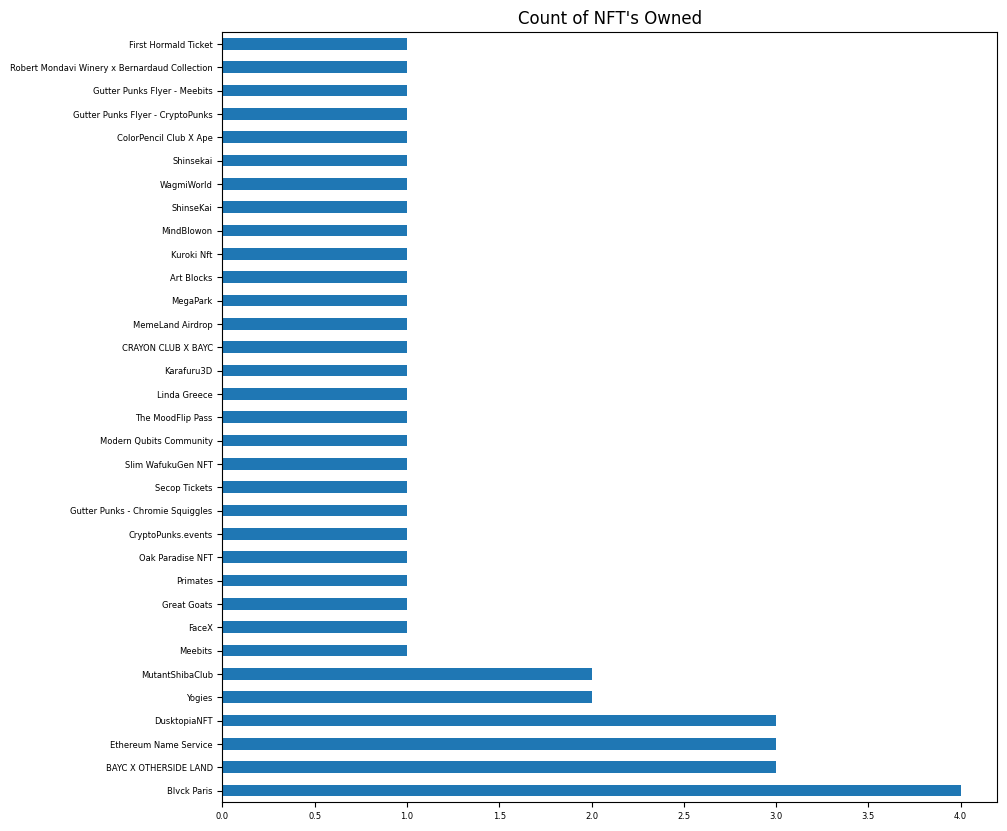

In [113]:
def visualizeNFTs():
    nft = pd.DataFrame(getNFTs()["nfts"])
    print(f"Total NFTs owned: {nft.shape[0]}")
    nft["tokenName"].value_counts().plot(kind="barh", fontsize=6, title="Count of NFT's Owned", figsize=(10, 10))
    plt.show()

visualizeNFTs()

### Plots a line graph representing the sale price of a slug over time

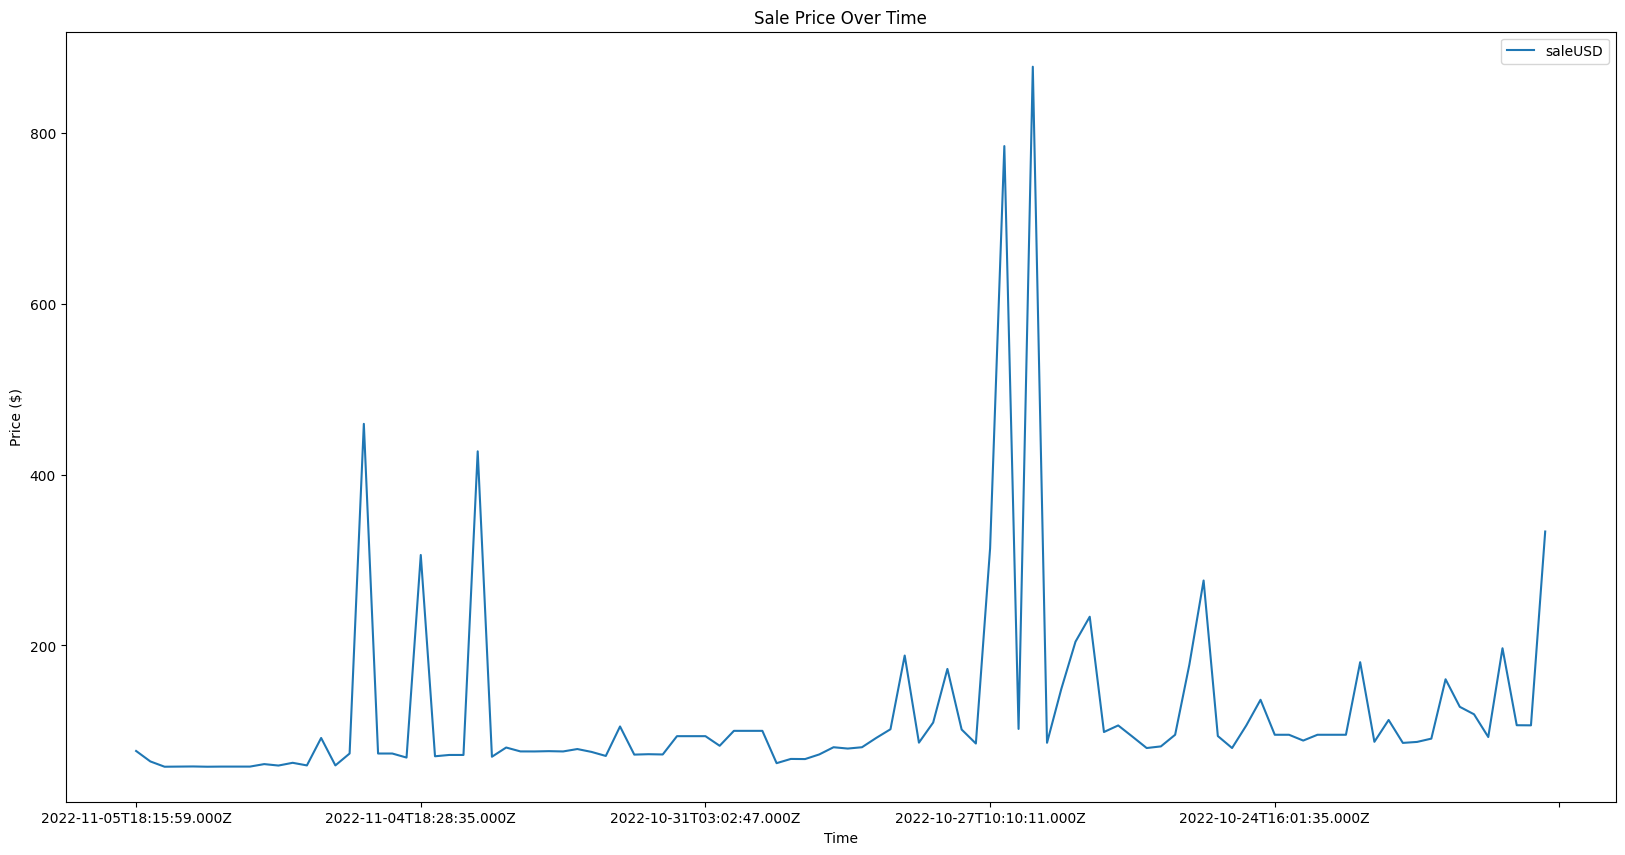

In [114]:
def visualizeSalePrice():
    salesEvents = pd.DataFrame(getSalesEvent()["sales"])
    salesEvents["time"] = pd.to_datetime(salesEvents["timestamp"]).dt.date
    salesEvents.plot(kind="line", x="timestamp", y="saleUSD", title="Sale Price Over Time", xlabel="Time", ylabel="Price ($)", figsize=(20,10))
    plt.show()

visualizeSalePrice()

### Prints a table of the top 100 wallets of a slug and important summary statistics

In [115]:
def visualizeOwnership():
    whales = pd.DataFrame(getOwnership()["ownership"]["results"])
    contractID = whales.loc[0, "contractId"]
    whales = whales[["address", "tokenCount", "floorAskPrice", "onSaleCount", "topBidValue", "totalBidValue", "id"]]
    totalTokens = whales["tokenCount"].sum()
    avgTokens = int(whales["tokenCount"].mean())

    print(f'Total tokens owned by top 100 whales: {totalTokens}')
    print(f'Average number of tokens owned by top 100 whales: {avgTokens}')
    print(f'Max number of tokens owned by top 100 whales: {whales["tokenCount"].max()}')
    print(f'Min number of tokens owned by top 100 whales: {whales["tokenCount"].min()}')
    print(f'Contract ID: {contractID}')
    return whales

visualizeOwnership()


Total tokens owned by top 100 whales: 3008
Average number of tokens owned by top 100 whales: 30
Max number of tokens owned by top 100 whales: 179
Min number of tokens owned by top 100 whales: 12
Contract ID: 0x18df6c571f6fe9283b87f910e41dc5c8b77b7da5


,address,tokenCount,floorAskPrice,onSaleCount,topBidValue,totalBidValue,id
0,0xc6a7463a7ee700d035aff7bfd1ee198d680a4164,179,NaN,0,None,None,0x18df6c571f6fe9283b87f910e41dc5c8b77b7da5:0xc...
1,0x8ee376de530fb9a734df676e7e4342b48355f483,144,0.140,2,None,None,0x18df6c571f6fe9283b87f910e41dc5c8b77b7da5:0x8...
2,0x056c53e9a170fb90052d66f43c3921522cff5167,128,NaN,0,None,None,0x18df6c571f6fe9283b87f910e41dc5c8b77b7da5:0x0...
3,0xd387a6e4e84a6c86bd90c158c6028a58cc8ac459,100,NaN,0,None,None,0x18df6c571f6fe9283b87f910e41dc5c8b77b7da5:0xd...
4,0xa25803ab86a327786bb59395fc0164d826b98298,86,NaN,0,None,None,0x18df6c571f6fe9283b87f910e41dc5c8b77b7da5:0xa...
5,0x7fd1eb213b9f2057113fd18bf8f2d9bfee760235,86,0.740,84,None,None,0x18df6c571f6fe9283b87f910e41dc5c8b77b7da5:0x7...
6,0x04fc8679ed5475979f7d4930fedbd1c82e79db3a,85,NaN,0,None,None,0x18df6c571f6fe9283b87f910e41dc5c8b77b7da5:0x0...
7,0x020ca66c30bec2c4fe3861a94e4db4a498a35872,73,NaN,0,None,None,0x18df6c571f6fe9283b87f910e41dc5c8b77b7da5:0x0...
8,0x5e11534344b8c1fda947b37dc57b8734232a6b1c,64,NaN,0,None,None,0x18df6c571f6fe9283b87f910e41dc5c8b77b7da5:0x5...
9,0x4eafc1cbd90027d1723010f70d99873e4801f053,51,NaN,0,None,None,0x18df6c571f6fe9283b87f910e41dc5c8b77b7da5:0x4...
